<a href="https://colab.research.google.com/github/Melanee-Melanee/My-Practice/blob/main/Milad_Vazan/Vazan_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is taken from:

https://www.researchgate.net/publication/358263339_yadgyry_mashyn_w_lm_dadh_mbany_mfahym_algwrytmha_w_abzarha

Page: 416

# PCA (Principal Components Analysis)

In [ ]:
from keras.datasets import mnist, fashion_mnist
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X=np.zeros((X_train.shape[0], 784))
for i in range(X_train.shape[0]):
  X[i]=X_train[i].flatten()

In [ ]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.25,
random_state=1400).reset_index(drop=True)
Y = Y.sample(frac=0.25,
random_state=1400).reset_index(drop=True)
df = X

In [ ]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df.values)

In [ ]:
pca_df = pd.DataFrame(data = pca_results
, columns = ['pca_1', 'pca_2'])
pca_df['label'] = Y

<bound method Axes.legend of <matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc484ae50>>

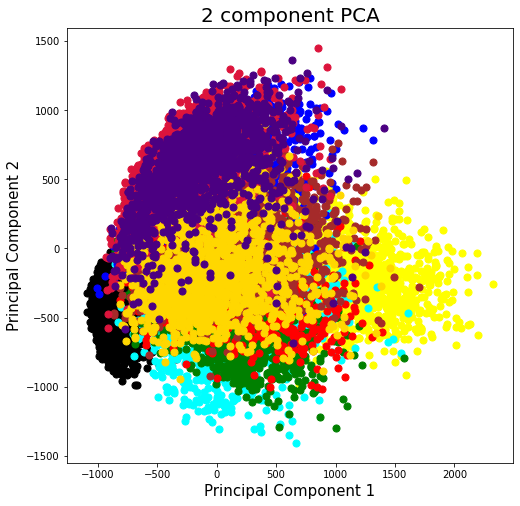

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b']
colors = dict(mcolors.BASE_COLORS,
**mcolors.CSS4_COLORS)
colors=['yellow', 'black', 'cyan', 'green', 'blue', 'red',
'brown','crimson', 'gold', 'indigo']
for target, color in zip(targets,colors):
  indicesToKeep = pca_df['label'] == target
  ax.scatter(pca_df.loc[indicesToKeep, 'pca_1']
  , pca_df.loc[indicesToKeep, 'pca_2']
  , c = color
  , s = 50)
ax.legend

# t_SNE

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [ ]:
X = np.zeros((X_train.shape[0], 784))
for i in range(X_train.shape[0]):
  X[i] = X_train[i].flatten()

In [ ]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.80,
random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.80,
random_state=10).reset_index(drop=True)
df = X
df['label'] = Y

In [ ]:
tsne = TSNE(n_components=2, verbose=1,
perplexity=40, n_iter=251)
tsne_results = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 38400 samples in 0.032s...
[t-SNE] Computed neighbors for 38400 samples in 102.936s...
[t-SNE] Computed conditional probabilities for sample 1000 / 38400
[t-SNE] Computed conditional probabilities for sample 2000 / 38400
[t-SNE] Computed conditional probabilities for sample 3000 / 38400
[t-SNE] Computed conditional probabilities for sample 4000 / 38400
[t-SNE] Computed conditional probabilities for sample 5000 / 38400
[t-SNE] Computed conditional probabilities for sample 6000 / 38400
[t-SNE] Computed conditional probabilities for sample 7000 / 38400
[t-SNE] Computed conditional probabilities for sample 8000 / 38400
[t-SNE] Computed conditional probabilities for sample 9000 / 38400
[t-SNE] Computed conditional probabilities for sample 10000 / 38400
[t-SNE] Computed conditional probabilities for sample 11000 / 38400
[t-SNE] Computed conditional probabilities for sample 12000 / 38400
[t-SNE] Computed conditional probabilities for 

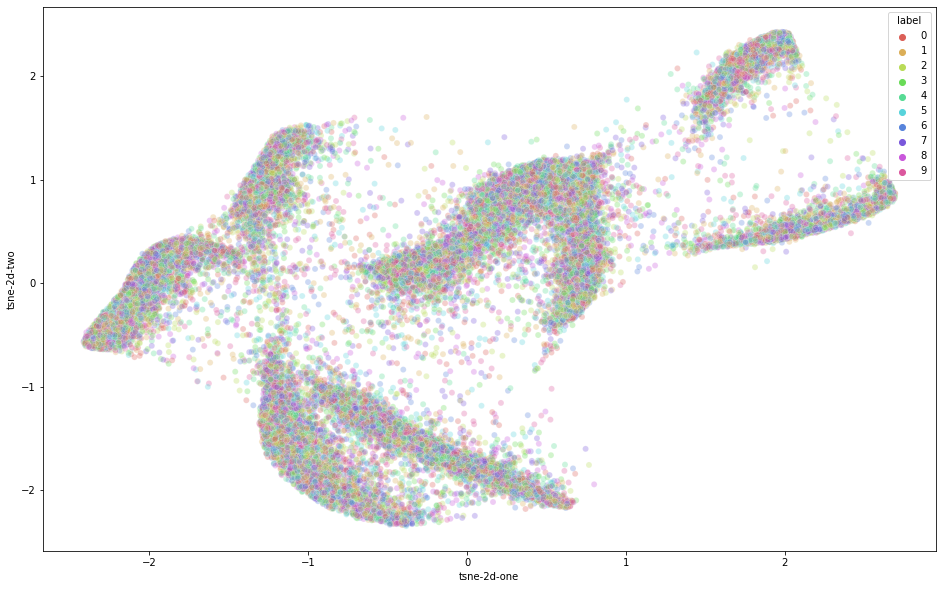

In [ ]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
x="tsne-2d-one", y="tsne-2d-two",
hue=df['label'],
palette=sns.color_palette("hls", 10),
data=df,
legend="full",
alpha=0.3)